In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

df = pd.read_csv('train.csv')
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [2]:
df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [3]:
for col in ['Survived', 'Age', 'SibSp', 'Parch', 'Fare']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


首先数据清洗，看看空值情况，先处理简单的。

In [4]:
# 处理 Embarked 的空值，就两个，'C'的获救率最高，缺失的都是获救的，全部替换为‘C’。这里有省略。
df_e = df.groupby('Embarked')['Survived'].mean()
df['Embarked'][df['Embarked'].isnull()] = 'C'
df['Cabin'][df['Cabin'].isnull()] = 0
df['Cabin'][df['Cabin'] != 0] = 1

D:\Anaconda3531\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3531\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Anaconda3531\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [5]:
df_test['Cabin'][df_test['Cabin'].isnull()] = 0
df_test['Cabin'][df_test['Cabin'] != 0] = 1
df_test['Fare'][df_test['Fare'].isnull()] = df_test['Fare'].mean()

D:\Anaconda3531\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3531\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3531\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
from scipy.interpolate import lagrange
# 自定义插值函数
def ployinterp_column(s, n, k=5):
    y = s[list(range(n-k, n)) + list(range(n+1, n+1+k))]
    y = y[y.notnull()]
    return lagrange(y.index, list(y))(n)
# 逐个元素判断是否需要插值
for j in range(len(df)):
        if (df['Age'].isnull())[j]:
            df['Age'][j] = ployinterp_column(df['Age'], j)

D:\Anaconda3531\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda3531\lib\site-packages\pandas\core\series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [7]:
for j in range(len(df_test)):
        if (df_test['Age'].isnull())[j]:
            df_test['Age'][j] = ployinterp_column(df_test['Age'], j)

D:\Anaconda3531\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3531\lib\site-packages\pandas\core\series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [8]:
df_1 = pd.get_dummies(df['Pclass'], prefix='Pclass')
df_2 = pd.get_dummies(df['Sex'], prefix='Sex')
df_3 = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, df_1, df_2, df_3], axis=1)
df_new = df.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 
                  'Embarked', 'Pclass_1', 'Sex_female', 'Embarked_C'], axis=1)

In [9]:
df_test1 = pd.get_dummies(df_test['Pclass'], prefix='Pclass')
df_test2 = pd.get_dummies(df_test['Sex'], prefix='Sex')
df_test3 = pd.get_dummies(df_test['Embarked'], prefix='Embarked')
df_test = pd.concat([df_test, df_test1, df_test2, df_test3], axis=1)
df_new_test = df_test.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 
                  'Embarked', 'Pclass_1', 'Sex_female', 'Embarked_C'], axis=1)
for col in ['Age', 'SibSp', 'Parch', 'Fare']:
    df_new_test[col] = (df_new_test[col] - df_new_test[col].mean(axis=0)) / df_new_test[col].std(axis=0)
df_new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Age           418 non-null float64
SibSp         418 non-null float64
Parch         418 non-null float64
Fare          418 non-null float64
Cabin         418 non-null object
Pclass_2      418 non-null uint8
Pclass_3      418 non-null uint8
Sex_male      418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(4), object(1), uint8(5)
memory usage: 18.4+ KB


In [10]:
for col in ['Age', 'SibSp', 'Parch', 'Fare']:
    df_new[col] = (df_new[col] - df_new[col].mean(axis=0)) / df_new[col].std(axis=0)

In [11]:
# 把数据集划分成80%的训练集，20%的测试集。
from sklearn.model_selection import train_test_split

df_col = np.array(df_new.columns)
x = df_new[df_col[1:]]
y = df_new[df_col[0]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
x_train = df_new[df_col[1:]]
y_train = df_new[df_col[0]]

D:\Anaconda3531\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


逻辑回归模型分类器的准确率为： 0.8156424581005587


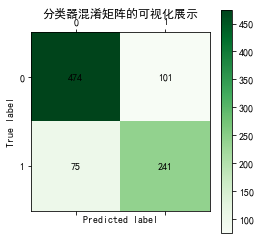

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

log = LogisticRegression(C=1.0,penalty='l1').fit(x_train, y_train)
print('逻辑回归模型分类器的准确率为：',accuracy_score(y_test, log.predict(x_test)))

def cm_plt(pred):
    conf_mat = confusion_matrix(y_train, pred) # conf_mat为分类情况的混淆矩阵
    plt.matshow(conf_mat, cmap=plt.cm.Greens)
    plt.colorbar()

    for x in range(len(conf_mat)):
        for y in range(len(conf_mat)):
            plt.annotate(conf_mat[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
        
    plt.title(u'分类器混淆矩阵的可视化展示')
    plt.ylabel('True label');
    plt.xlabel('Predicted label');
# 对逻辑回归模型的混淆矩阵进行可视化展示
cm_plt(log.predict(x_train))

In [18]:
predictions = log.predict(df_new_test)
result = pd.DataFrame({'PassengerId':df_test['PassengerId'].as_matrix(), 'Survived':predictions})
result.to_csv("logistic_regression_predictions.csv", index=False)
predictions

D:\Anaconda3531\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [13]:
# from sklearn.svm import SVC
# from sklearn.metrics import confusion_matrix, accuracy_score
# # 核函数在这里对结果影响不大，当然你可能通过调整参数得到更好的模型。
# clf = SVC(kernel='linear', probability=True).fit(x_train, y_train)
# print('支持向量机模型分类器的准确率为：',accuracy_score(y_test, clf.predict(x_test)))

# def cm_plt(pred):
#     conf_mat = confusion_matrix(y_train, pred) # conf_mat为分类情况的混淆矩阵
#     plt.matshow(conf_mat, cmap=plt.cm.Greens)
#     plt.colorbar()

#     for x in range(len(conf_mat)):
#         for y in range(len(conf_mat)):
#             plt.annotate(conf_mat[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
        
#     plt.title(u'分类器混淆矩阵的可视化展示')
#     plt.ylabel('True label');
#     plt.xlabel('Predicted label');
# # 训练集混淆矩阵的可视化展示
# cm_plt(clf.predict(x_train))

In [14]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import confusion_matrix, accuracy_score

# tree = DecisionTreeClassifier().fit(x_train, y_train)
# print('CART决策树模型分类器的准确率为：',accuracy_score(y_test, tree.predict(x_test)))

# # 对决策树训练集混淆矩阵进行可视化展示
# cm_plt(tree.predict(x_train))

In [15]:
# from keras.models import Sequential
# from keras.layers.core import Dense, Activation
# # 建立神经网络
# net = Sequential()
# net.add(Dense(input_dim=10,output_dim=10))  # 添加输入层（3节点）到隐藏层（10节点）的连接
# net.add(Activation('relu'))  # 隐藏层使用relu激活函数
# net.add(Dense(input_dim=10,output_dim=1))   # 添加隐藏层到输出层的连接
# net.add(Activation('sigmoid'))  # 输出层使用sigmoid激活函数
# net.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # 编译模型，使用adam方法求解

# net.fit(x_train, y_train, nb_epoch=100, batch_size=1)

# cm_plt(net.predict_classes(x_train).reshape(len(x_train)))

In [16]:
# predictions = tree.predict(df_new_test)
# # result = pd.DataFrame({'PassengerId':df_test['PassengerId'].as_matrix(), 'Survived':predictions})
# # result.to_csv("logistic_regression_predictions.csv", index=False)
# predictions

In [17]:
# predictions = net.predict_classes(df_new_test).reshape(len(df_new_test))
# result = pd.DataFrame({'PassengerId':df_test['PassengerId'].as_matrix(), 'Survived':predictions})
# result.to_csv("logistic_regression_predictions.csv", index=False)